In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [18]:
data = pd.read_csv('PSN 20315 Main Cleaned.csv')

In [19]:
X = data.drop([data.columns[0], data.columns[2]], axis=1)  
y = data[data.columns[2]] 

In [20]:
categorical_cols = X.select_dtypes(include=['object']).columns


preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), X.select_dtypes(include=['float64', 'int64']).columns),  
        ('cat', OneHotEncoder(), categorical_cols)  
    ])

In [21]:
X = preprocessor.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [23]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         3

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6



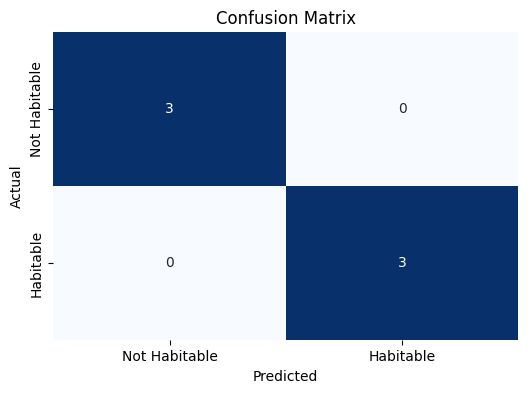

In [24]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Habitable', 'Habitable'],
            yticklabels=['Not Habitable', 'Habitable'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

test_data = data.iloc[y_test.index].copy()  # Create a copy of the test data to avoid SettingWithCopyWarning
test_data.loc[:, 'Predicted_Habitability'] = y_pred  # Add the predicted values using .loc

correctly_predicted = test_data[test_data[data.columns[2]] == test_data['Predicted_Habitability']]
incorrectly_predicted = test_data[test_data[data.columns[2]] != test_data['Predicted_Habitability']]

In [25]:
correctly_predicted.to_csv('Correctly_Predicted_Planets.csv', index=False)
incorrectly_predicted.to_csv('Incorrectly_Predicted_Planets.csv', index=False)

print("Correctly predicted planets saved to 'Correctly_Predicted_Planets.csv'")
print("Incorrectly predicted planets saved to 'Incorrectly_Predicted_Planets.csv'")

Correctly predicted planets saved to 'Correctly_Predicted_Planets.csv'
Incorrectly predicted planets saved to 'Incorrectly_Predicted_Planets.csv'
